In [1]:
import datetime as dt
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm

In [2]:
mi_dir = '/home/wmnlab/Work/sheng-ru/2022-09-07/mi2log'
ci_dir = '/home/wmnlab/Work/sheng-ru/2022-09-07/cimon'
mi_files = os.listdir(mi_dir)
mi_files.sort()
ci_files = os.listdir(ci_dir)
ci_files.sort()

In [3]:
mi_phy_files = []
mi_rrc_files = []
for file in mi_files:
    if '_phy_new.csv' in file:
        mi_phy_files.append(file)
    if '_rrc.csv' in file:
        mi_rrc_files.append(file)

In [4]:
mi_phy_files, mi_rrc_files

(['diag_log_sm05_2022-09-07_17-18-56.mi2log.txt_phy_new.csv',
  'diag_log_sm05_2022-09-07_17-25-35.mi2log.txt_phy_new.csv',
  'diag_log_sm05_2022-09-07_17-33-41.mi2log.txt_phy_new.csv',
  'diag_log_sm05_2022-09-07_17-42-44.mi2log.txt_phy_new.csv',
  'diag_log_sm05_2022-09-07_17-49-24.mi2log.txt_phy_new.csv',
  'diag_log_sm05_2022-09-07_17-55-37.mi2log.txt_phy_new.csv',
  'diag_log_sm06_2022-09-07_17-18-56.mi2log.txt_phy_new.csv',
  'diag_log_sm06_2022-09-07_17-25-35.mi2log.txt_phy_new.csv',
  'diag_log_sm06_2022-09-07_17-33-41.mi2log.txt_phy_new.csv',
  'diag_log_sm06_2022-09-07_17-42-44.mi2log.txt_phy_new.csv',
  'diag_log_sm06_2022-09-07_17-49-24.mi2log.txt_phy_new.csv',
  'diag_log_sm06_2022-09-07_17-55-37.mi2log.txt_phy_new.csv',
  'diag_log_sm07_2022-09-07_17-18-56.mi2log.txt_phy_new.csv',
  'diag_log_sm07_2022-09-07_17-25-35.mi2log.txt_phy_new.csv',
  'diag_log_sm07_2022-09-07_17-33-41.mi2log.txt_phy_new.csv',
  'diag_log_sm07_2022-09-07_17-42-44.mi2log.txt_phy_new.csv',
  'diag_

In [41]:
# #=========================================
# xs = [] ## Time
# out_lier_value = 2 ## sec
# time_dif_list = []
# which_phone = []
# s = {'sm05':[0,'all','g'], 'sm06':[1,'B1 B3','r'], 'sm07':[2,'B3 B28','c'], 'sm08':[3,'B1 B28','m']} ## phone: index, band, color

# for file in mi_phy_files:
#     for phone in s.keys():
#         if phone in file:
#             which_phone.append(phone)
#     mi_file_path = os.path.join(mi_dir,file)
#     mi_df = pd.read_csv(mi_file_path)
#     mi_df.loc[:, "time"] = pd.to_datetime(mi_df.loc[:, "time"]) + dt.timedelta(hours=8)
#     mi_df = mi_df[mi_df.type_id == 'LTE_PHY_Connected_Mode_Intra_Freq_Meas']

#     x = []
#     time_dif = []
#     restart = True
#     for i in range(len(mi_df)):
#         # pci = mi_df.loc[i,"PCI"]
#         serving_cell_id =  mi_df["Serving Cell Index"].iloc[i]

#         if serving_cell_id == 'PCell':
#             if restart == True:
#                 now = mi_df["time"].iloc[i]
#                 # pre_time = mi_df.loc[i,"time"]
#                 start_index = i
#                 pre_ser_id = serving_cell_id
#                 restart = False
#                 continue
#             pre_pcell_time = now ## Update Time
#             now = mi_df["time"].iloc[i]

#             if pre_ser_id == 'PCell' and ( i+1==len(mi_df) or mi_df["Serving Cell Index"].iloc[i+1] == 'PCell'):
#                 if (now-pre_pcell_time).total_seconds() < out_lier_value:
#                     x.append(now)
#                     time_dif.append((now-pre_pcell_time).total_seconds())
#             elif pre_ser_id == 'PCell':
#                 start_time = mi_df["time"].iloc[i-1]
#             elif pre_ser_id != 'PCell' and i+1 != len(mi_df) :

#                 if pre_pcell_time == mi_df["time"].iloc[start_index]:
#                     if start_index == 0:
#                         pre_ser_id = serving_cell_id
#                         pre_time = mi_df["time"].iloc[i]
#                         continue
#                     else:
#                         start_time = mi_df["time"].iloc[start_index-1]
                    
            
#                 if (pre_time-start_time).total_seconds() < out_lier_value:
#                     x.append(pre_time)
#                     time_dif.append((pre_time-start_time).total_seconds())
#                 if mi_df["Serving Cell Index"].iloc[i+1] != 'PCell':
#                     start_time = mi_df["time"].iloc[i-1]

#         pre_ser_id = serving_cell_id
#         pre_time = mi_df["time"].iloc[i]
#     xs.append(x)
#     time_dif_list.append(time_dif)

In [9]:
#======== Naive track different band neighbor cell measurement time 
xs = [] ## Time
out_lier_value = 2 ## sec
time_dif_list = []
which_phone = []
s = {'sm05':[0,'all','g'], 'sm06':[1,'B1 B3','r'], 'sm07':[2,'B3 B28','c'], 'sm08':[3,'B1 B28','m']} ## phone: index, band, color

for file in mi_phy_files:
    for phone in s.keys():
        if phone in file:
            which_phone.append(phone)
    mi_file_path = os.path.join(mi_dir,file)
    mi_df = pd.read_csv(mi_file_path)
    mi_df.loc[:, "time"] = pd.to_datetime(mi_df.loc[:, "time"]) + dt.timedelta(hours=8)
    mi_df = mi_df[mi_df.type_id == 'LTE_PHY_Connected_Mode_Intra_Freq_Meas']

    x = []
    time_dif = []
    restart = True
    for i in range(len(mi_df)):
        # pci = mi_df.loc[i,"PCI"]
        # serving_cell_id =  mi_df["Serving Cell Index"].iloc[i]
        earfcn = mi_df["EARFCN"].iloc[i]
        time = mi_df["time"].iloc[i]

        if restart == True:
            pre_earfcn = earfcn
            pre_time = time
            restart = False
            continue

        if pre_earfcn != earfcn:
            x.append(time)
            time_dif.append((time - pre_time).total_seconds())
            pre_time = time

        pre_earfcn = earfcn
        

    xs.append(x)
    time_dif_list.append(time_dif)

In [11]:
time_dif_list[0][:5], xs[0][:5]

([0.140053, 0.039238, 0.036791, 0.068197, 0.141818],
 [Timestamp('2022-09-07 17:18:56.464649'),
  Timestamp('2022-09-07 17:18:56.503887'),
  Timestamp('2022-09-07 17:18:56.540678'),
  Timestamp('2022-09-07 17:18:56.608875'),
  Timestamp('2022-09-07 17:18:56.750693')])

In [12]:
# Calculate Average
sums = [0,0,0,0]
number = [0,0,0,0]
for i in range(len(time_dif_list)):
    k = 0
    num = 0
    for dif in time_dif_list[i]:
        k += dif
        num += 1
    ind = s[which_phone[i]][0]
    sums[ind] += k
    number[ind] += num
means = [i / j for i, j in zip(sums, number)]

In [13]:
print(means)
print(number)

[0.4073913294037245, 0.5625915059350501, 0.35839150720800206, 0.5761618813905928]
[5853, 4465, 6798, 4401]


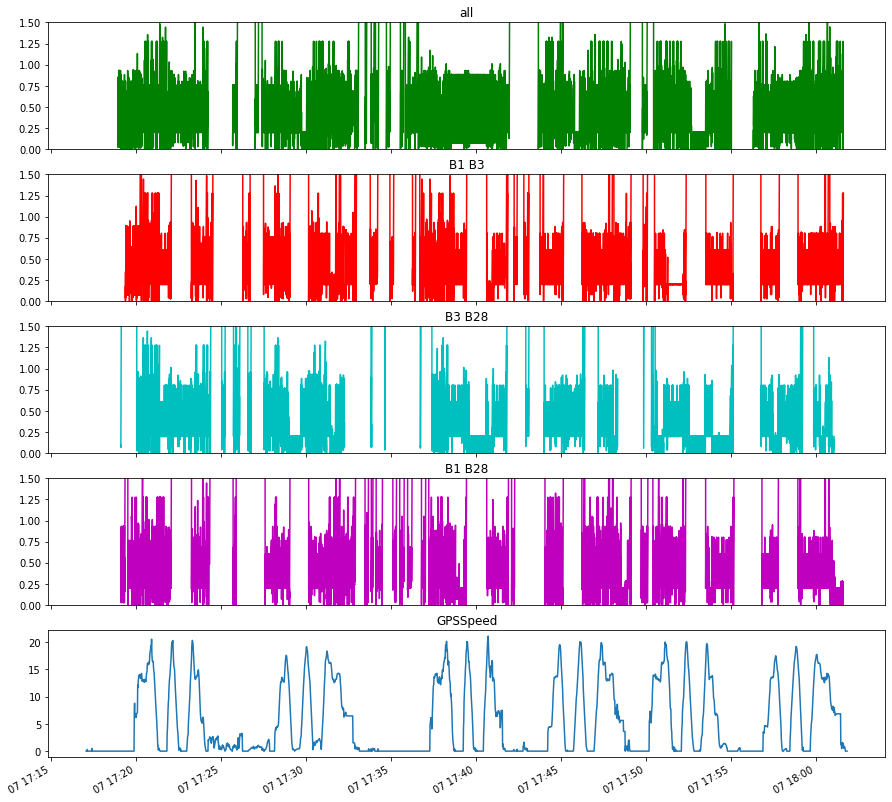

In [14]:
fig, axs = plt.subplots(5,1,figsize=(15, 15), sharex=True)
plt.gcf().autofmt_xdate()
for i in range(len(xs)):
    ind = s[which_phone[i]][0]
    color = s[which_phone[i]][2]
    axs[ind].plot(xs[i], time_dif_list[i], color)
    axs[ind].set_ylim([0, 1.5])
    axs[ind].title.set_text(s[which_phone[i]][1])
# axs.set_xlabel('Time')
# axs.set_ylabel('phy_report_diff', color='g')
# ax2.set_ylabel('speed', color='b')
ci_file_path = os.path.join(ci_dir,ci_files[0])
ci_df = pd.read_csv(ci_file_path)
ci_df.loc[:, "Date"] = pd.to_datetime(ci_df.loc[:, "Date"])
x = ci_df["Date"]
y = ci_df["GPSSpeed"]
axs[4].plot(x,y)
axs[4].title.set_text('GPSSpeed')


plt.show()

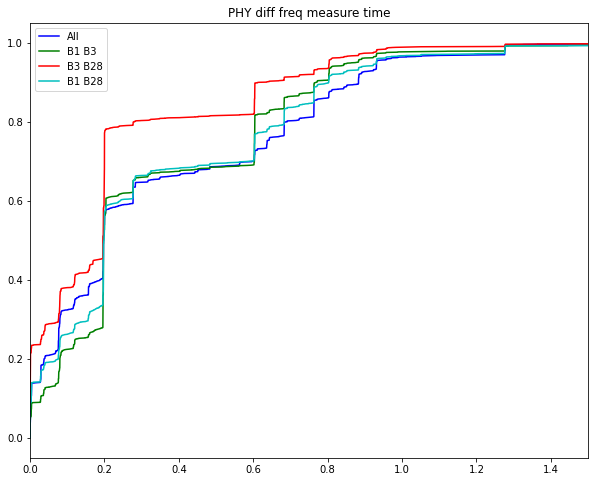

In [18]:
## CDF
A = []
a = []
colors = ['b','g','r','c','m','y','k','w']
plt.figure(figsize=(10,8))
for i in range(len(time_dif_list)):
    a += time_dif_list[i]
    if i%6 == 5:
        A.append(a)
        a = []

for i in range(len(A)):
    x = sorted(A[i])
    pdf = np.ones(len(A[i]))/len(A[i])
    cdf = np.cumsum(pdf)
    plt.plot(x, cdf, colors[i])

plt.title('PHY diff freq measure time')
plt.legend(['All','B1 B3', 'B3 B28', 'B1 B28'])
plt.xlim(0,1.5)
plt.show()

# Cellinfo PCI and earfcn. 

In [20]:
ci_files
s = {'sm05':[0,'all','g'], 'sm06':[1,'B1 B3','r'], 'sm07':[2,'B3 B28','c'], 'sm08':[3,'B1 B28','m']} ## phone: index, band, color
times = []
pci_nums = []
earfcn_nums = []
earfcn_pci = {}
for file in ci_files:
    ci_file_path = os.path.join(ci_dir,file)
    ci_df = pd.read_csv(ci_file_path)
    ci_df.loc[:, "Date"] = pd.to_datetime(ci_df.loc[:, "Date"])
    C = ci_df.iloc
    time = []
    pci_num = []
    earfcn_num = []
    for element in C:
        pci = set()
        earfcn = set()
        time.append(element[0])
        p = str(element[11]) ## 目前的PCI
        e = str(element[16])
        if int(p) > 1000 or int(e) < 0: ## 有時後會遇到奇怪的資料
            time.pop()
            continue
        pci.add(p) 
        earfcn.add(e)
        if e not in earfcn_pci: ## //
            earfcn_pci[e] = {p}
        elif p not in earfcn_pci[e]:
            earfcn_pci[e].add(p) ## //

        for i in range(17,len(element), 4): ## Neighbor 
            if element[i] != '-':
                p = element[i]
                e = element[i+3]
                pci.add(p)
                earfcn.add(e)
                if e not in earfcn_pci: ## //
                    earfcn_pci[e] = {p}
                elif p not in earfcn_pci[e]:
                    earfcn_pci[e].add(p) ## //
            else:
                break
        pci_num.append(len(pci))
        earfcn_num.append(len(earfcn))
    times.append(time)
    pci_nums.append(pci_num)
    earfcn_nums.append(earfcn_num)
    

In [21]:
## B1:275, B3:1275, B28:9560
for key in earfcn_pci.keys():
    print(key,':',len(earfcn_pci[key]),sep='')

1275:100
275:55
9560:78


In [22]:
pci_n_avg = [sum(i)/len(i) for i in pci_nums]
pci_n_avg

[4.891995404059747, 4.87063339731286, 4.494793675279599, 4.890518596123625]

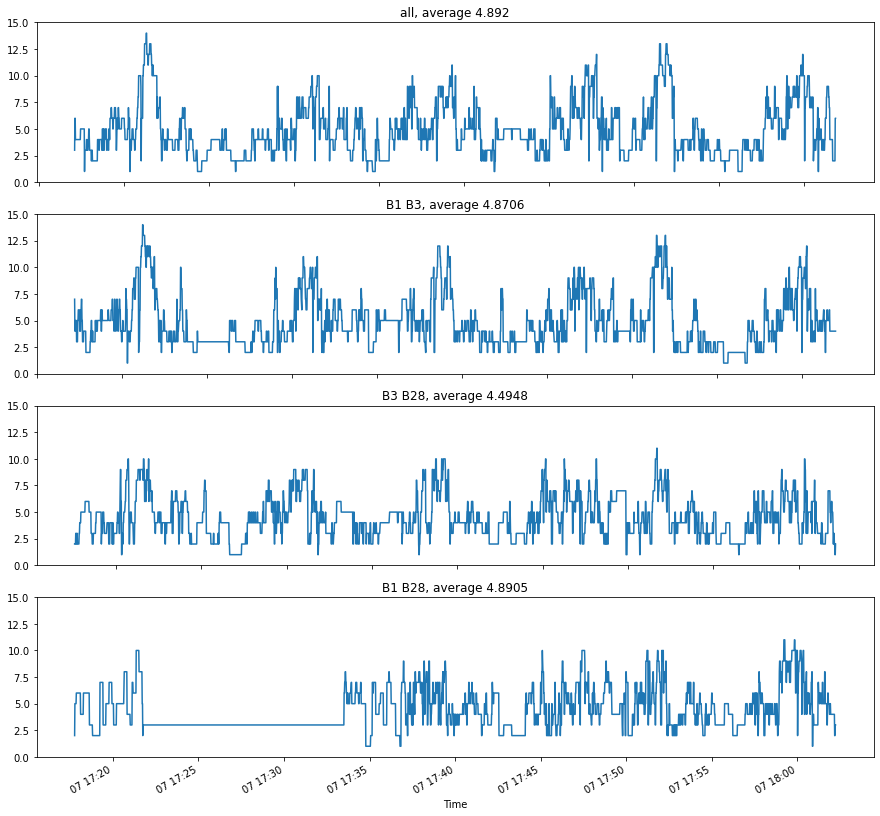

In [23]:
## Available PCI
fig, axs = plt.subplots(4,1,figsize=(15, 15))
plt.gcf().autofmt_xdate()
for phone in s.keys():
    ind = s[phone][0]
    axs[ind].plot(times[ind], pci_nums[ind])
    axs[ind].title.set_text(f'{s[phone][1]}, average {round(pci_n_avg[ind],4)}')
    axs[ind].set_ylim([0, 15])

axs[3].set_xlabel('Time')

plt.show()

In [25]:
earfcn_n_avg = [sum(i)/len(i) for i in earfcn_nums]
earfcn_n_avg

[1.7786288778245882,
 1.6790786948176584,
 1.6405707674508292,
 1.5646935568360398]

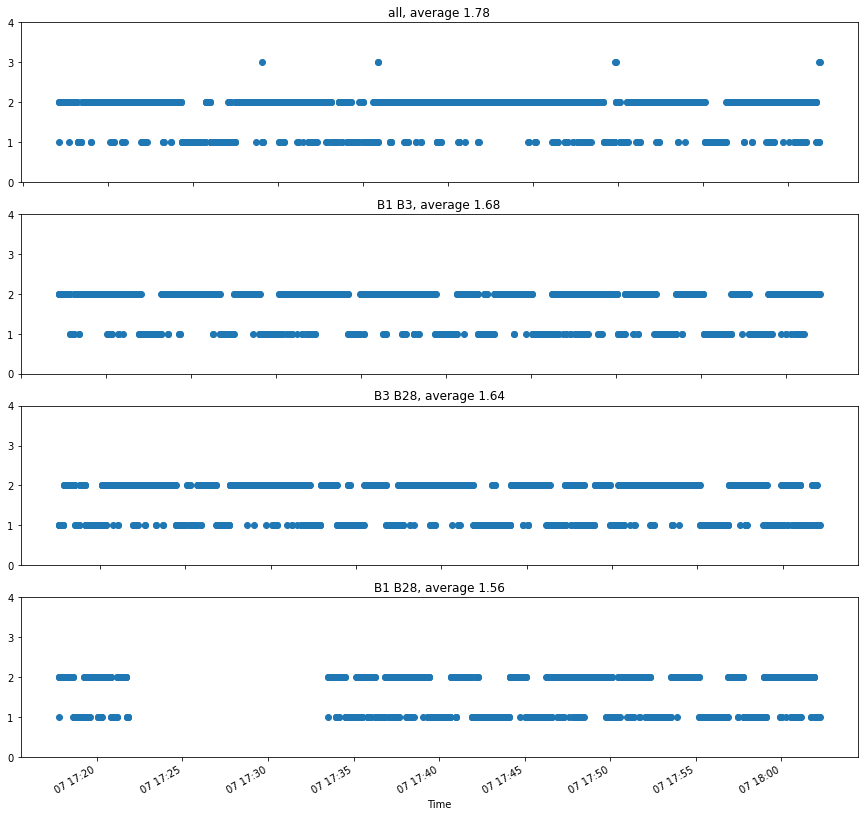

In [27]:
# Available earfcn
fig, axs = plt.subplots(4,1,figsize=(15, 15))
plt.gcf().autofmt_xdate()
for phone in s.keys():
    ind = s[phone][0]
    axs[ind].plot(times[ind], earfcn_nums[ind],'o')
    axs[ind].title.set_text(f'{s[phone][1]}, average {round(earfcn_n_avg[ind],2)}')
    axs[ind].set_ylim([0, 4])

axs[3].set_xlabel('Time')

plt.show()

## MobileInsight RRC message

In [11]:
which_phone = []
s = {'sm05':[0,'all','g'], 'sm06':[1,'B1 B3','r'], 'sm07':[2,'B3 B28','c'], 'sm08':[3,'B1 B28','m']} ## phone: index, band, color

lte_handover_lists = []
both_handover_lists = []
nr_setup_lists = []
nr_handover_lists = []

nr_release_lists = []

lte_failure_lists = []
reestbli_cause_lists = []
nr_failure_lists = []
nr_failuretype_lists = []

for file in mi_rrc_files:
    for phone in s.keys():
        if phone in file:
            which_phone.append(phone)

    mi_file_path = os.path.join(mi_dir,file)
    mi_df = pd.read_csv(mi_file_path)
    mi_df.loc[:, "time"] = pd.to_datetime(mi_df.loc[:, "time"]) + dt.timedelta(hours=8)
    
    lte_handover = []
    both_handover = []
    nr_setup = []
    nr_handover = []

    nr_release = []

    lte_failure = []
    reestbli_cause = []
    nr_failure = []
    nr_failure_type = []

    for i in range(len(mi_df)):

        if mi_df["type_id"].iloc[i] == "5G_NR_RRC_OTA_Packet": ## We actually don't need 5G_OTA packet under NSA. All we need are in LTE_OTA packet.
            continue

        if mi_df["lte-rrc.t304"].iloc[i] == 1 and mi_df["nr-rrc.t304"].iloc[i] == 1: ## 依照NSA的EN-DC架構，分類LTE,NR的HO
            both_handover.append(mi_df["time"].iloc[i])
        elif mi_df["lte-rrc.t304"].iloc[i] == 1:
            lte_handover.append(mi_df["time"].iloc[i])
        elif mi_df["nr-rrc.t304"].iloc[i] == 1:
            if mi_df["dualConnectivityPHR: setup (1)"].iloc[i] == 1:
                nr_setup.append(mi_df["time"].iloc[i])
            else:
                nr_handover.append(mi_df["time"].iloc[i])
        
        if mi_df["nr-Config-r15: release (0)"].iloc[i] == 1:
            nr_release.append(mi_df["time"].iloc[i])

        if mi_df["rrcConnectionReestablishmentRequest"].iloc[i] == 1: ## 其實還要在分type2和type3
            lte_failure.append(mi_df["time"].iloc[i])
            reestbli_cause.append(mi_df["reestablishmentCause"].iloc[i])
        
        if mi_df["scgFailureInformationNR-r15"].iloc[i] == 1: ## 其實還要再分是否決定重連，重連後是否LTE和NR都重連
            nr_failure.append(mi_df["time"].iloc[i])
            nr_failure_type.append(mi_df["failureType-r15"].iloc[i])

    lte_handover_lists.append(lte_handover)
    both_handover_lists.append(both_handover)
    nr_setup_lists.append(nr_setup)
    nr_handover_lists.append(nr_handover)

    nr_release_lists.append(nr_release)

    lte_failure_lists.append(lte_failure)
    reestbli_cause_lists.append(reestbli_cause)
    nr_failure_lists.append(nr_failure)
    nr_failuretype_lists.append(nr_failure_type)

In [12]:
lte_ho_nums = np.zeros(4)
both_ho_nums = np.zeros(4)
nr_setup_nums = np.zeros(4)
nr_ho_nums = np.zeros(4)

nr_release_nums = np.zeros(4)

lte_failure_nums = np.zeros(4)
nr_failure_nums = np.zeros(4)

for i in range(len(which_phone)):
    ind = s[which_phone[i]][0]

    lte_ho_nums[ind] += len(lte_handover_lists[i])
    both_ho_nums[ind] += len(both_handover_lists[i])
    nr_setup_nums[ind] += len(nr_setup_lists[i])
    nr_ho_nums[ind] += len(nr_handover_lists[i])

    nr_release_nums[ind] += len(nr_release_lists[i])

    lte_failure_nums[ind] += len(lte_failure_lists[i])
    nr_failure_nums[ind] += len(nr_failure_lists[i])

print(lte_ho_nums, lte_ho_nums+both_ho_nums)
print(both_ho_nums)
print(nr_setup_nums, nr_setup_nums+nr_ho_nums+both_ho_nums)
print(nr_ho_nums, nr_ho_nums+both_ho_nums)
print(lte_ho_nums+both_ho_nums+nr_setup_nums+nr_ho_nums)
print(nr_release_nums)
print(lte_failure_nums)
print(nr_failure_nums)

[26. 72. 96. 51.] [ 99.  99. 119. 130.]
[73. 27. 23. 79.]
[65. 19. 25. 43.] [189.  79.  64. 160.]
[51. 33. 16. 38.] [124.  60.  39. 117.]
[215. 151. 160. 211.]
[46. 14. 15. 34.]
[4. 5. 6. 0.]
[1. 2. 2. 5.]


In [25]:
reestbli_cause_lists, nr_failuretype_lists

([['otherFailure (2)'],
  [],
  [],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  [],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  ['otherFailure (2)'],
  ['otherFailure (2)', 'otherFailure (2)'],
  ['otherFailure (2)'],
  [],
  ['otherFailure (2)', 'otherFailure (2)'],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  ['rlc-MaxNumRetx (2)'],
  [],
  ['rlc-MaxNumRetx (2)'],
  ['rlc-MaxNumRetx (2)'],
  [],
  [],
  [],
  [],
  ['rlc-MaxNumRetx (2)'],
  ['rlc-MaxNumRetx (2)'],
  [],
  [],
  [],
  [],
  [],
  ['rlc-MaxNumRetx (2)', 'synchReconfigFailureSCG (3)', 'rlc-MaxNumRetx (2)'],
  ['rlc-MaxNumRetx (2)'],
  ['rlc-MaxNumRetx (2)'],
  []])

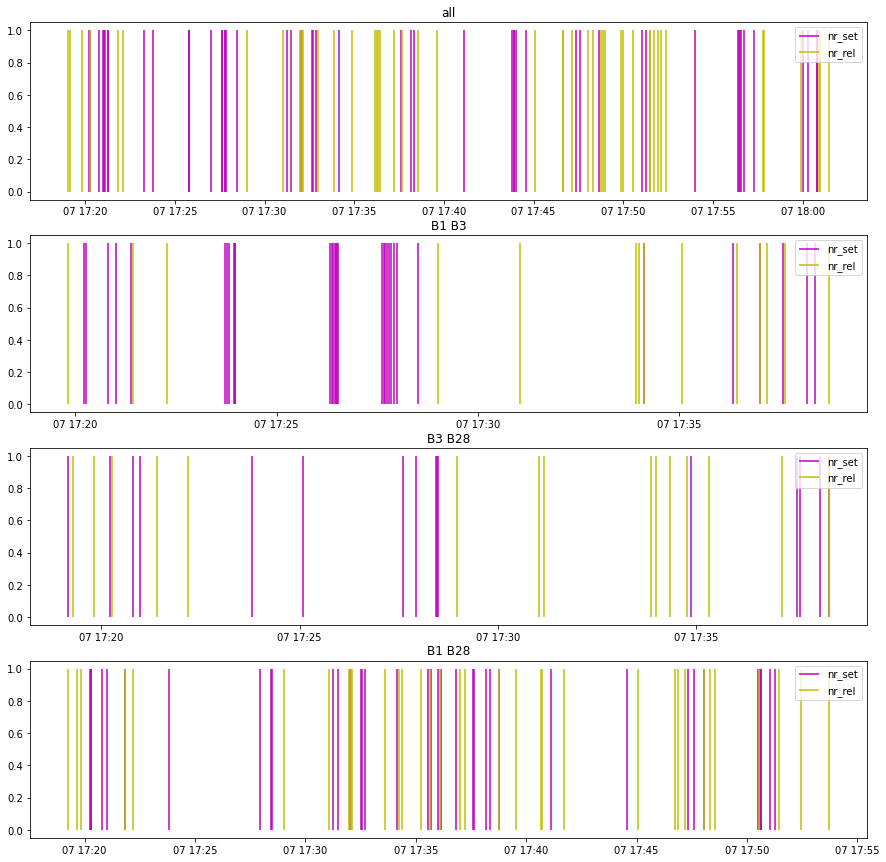

In [24]:
fig, axs = plt.subplots(4,1,figsize=(15, 15))
# plt.gcf().autofmt_xdate()
colors = ['b','g','r','c','m','y','k','w']
for i in range(len(which_phone)):
    ind = s[which_phone[i]][0]

    # axs[ind].vlines(x=lte_handover_lists[i],ymin=0,ymax=1, color=colors[1], label='lte_ho')
    # axs[ind].vlines(x=both_handover_lists[i],ymin=0,ymax=1,color=colors[2], label='both_ho')
    # axs[ind].vlines(x=nr_setup_lists[i],ymin=0,ymax=1,color=colors[3], label='nr_ho')
    axs[ind].vlines(x=nr_handover_lists[i],ymin=0,ymax=1,color=colors[4], label='nr_set')
    axs[ind].vlines(x=nr_release_lists[i],ymin=0,ymax=1,color=colors[5], label='nr_rel')

    
    # axs[ind].vlines(lte_failure_lists[i],ymin=0,ymax=1,color=colors[6], label='lte_fail')
    # axs[ind].vlines(nr_failure_lists[i],ymin=0,ymax=1,color=colors[7], label='nr_fail')
    
    if i%6 == 0:
        axs[ind].legend()
    axs[ind].title.set_text(s[which_phone[i]][1])

    
# axs.set_xlabel('Time')
# axs.set_ylabel('phy_report_diff', color='g')
# ax2.set_ylabel('speed', color='b')
plt.show()

底下只是實驗code=========================================

In [ ]:
# mi2log.txt.csv
mi_file_path = os.path.join(mi_dir,'diag_log_sm05_2022-09-07_17-18-56.mi2log.txt_phy_new.csv')
mi_df = pd.read_csv(mi_file_path)
mi_df.loc[:, "time"] = pd.to_datetime(mi_df.loc[:, "time"]) + dt.timedelta(hours=8)
# _new.csv
ci_path = os.path.join(ci_dir,'cimon_sm05_2022-09-07_17-17-04_new.csv')
ci_df = pd.read_csv(ci_path)
ci_df.loc[:, "Date"] = pd.to_datetime(ci_df.loc[:, "Date"])

In [ ]:
x = []
time_diff = []
for i in range(len(mi_df)):
    if mi_df.loc[i,"type_id"] == "LTE_PHY_Connected_Mode_Intra_Freq_Meas":
        try:
            b
        except NameError:
            b = mi_df.loc[i,"time"]
            continue
        a = b
        b = mi_df.loc[i,"time"]
        x.append(b)
        time_diff.append((b-a).total_seconds())
del a, b

In [ ]:
x_ = []
time_diff_ = []
for i in range(len(mi_df)):
    if mi_df.loc[i,"type_id"] == "LTE_PHY_Connected_Mode_Intra_Freq_Meas":
        try:
            b
        except NameError:
            b = mi_df.loc[i,"time"]
            continue
        a = b
        b = mi_df.loc[i,"time"]
        x_.append(b)
        time_diff_.append((b-a).total_seconds())
del a, b

In [ ]:
t = []
speed = []
for i in range(len(ci_df)):
    if x[0] < ci_df["Date"].iloc[i] < x[-1]:
        t.append(ci_df["Date"].iloc[i])
        speed.append(ci_df["GPSSpeed"].iloc[i])
    if ci_df["Date"].iloc[i] > x[-1]:
        break

In [ ]:
plt.plot(x, time_diff)
plt.ylim([0,1.5])
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()
plt.gcf().autofmt_xdate()
ax2 = ax1.twinx()
ax1.plot(x, time_diff, 'g-')
ax1.plot(x_, time_diff_, 'g-')
ax2.plot(t, speed, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylim([0, 1.5])
ax1.set_ylabel('phy_report_diff', color='g')
ax2.set_ylabel('speed', color='b')

plt.show()

In [ ]:
fig, ax1 = plt.subplots()
plt.gcf().autofmt_xdate()
ax2 = ax1.twinx()
ax1.plot(x, time_diff, 'g-')
ax
ax2.plot(t, speed, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('phy_report_diff', color='g')
ax2.set_ylabel('speed', color='b')

plt.show()